In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [269]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [270]:
data.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [271]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [272]:
skewness=data.skew()
print(skewness)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


In [273]:
from sklearn.preprocessing import StandardScaler

In [274]:
copy=data.copy()

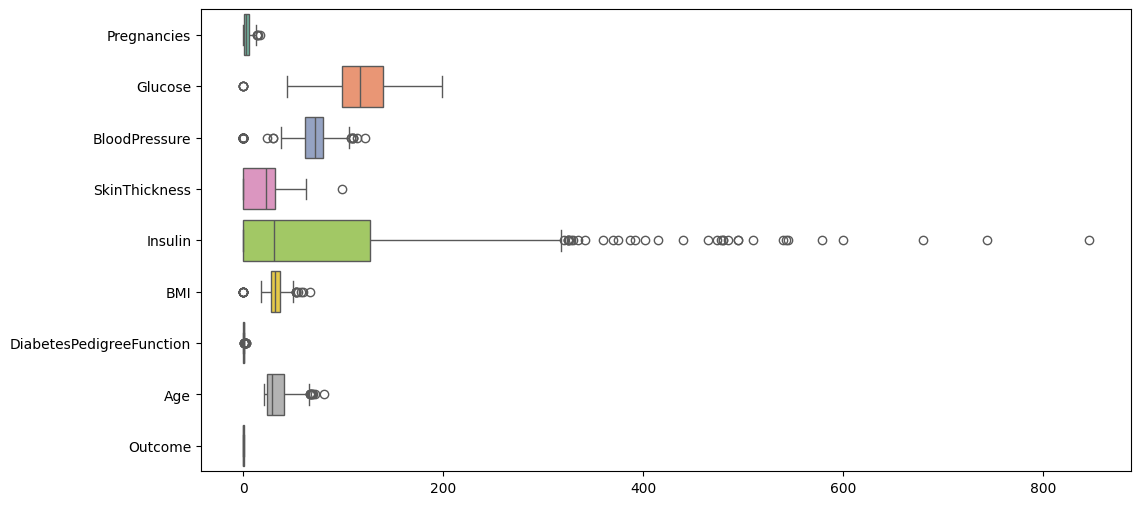

In [275]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,orient="h",palette="Set2")
plt.show()

In [276]:
print(data.shape)
IQR= data.quantile(0.75)-data.quantile(0.25)
lower_limit= data.quantile(0.25)-(1.5*IQR)
upper_limit= data.quantile(0.75)+(1.5*IQR)
data=data[~((data<lower_limit)|(data>upper_limit)).any(axis=1)]
print(data.shape)

(768, 9)
(639, 9)


In [277]:
# skewness=data.skew()
# print(skewness)
# for i in skewness.index:
#     if abs(skewness[i])>0.5:
#         data[i]=np.log1p(data[i])

In [278]:
copy=data.copy()

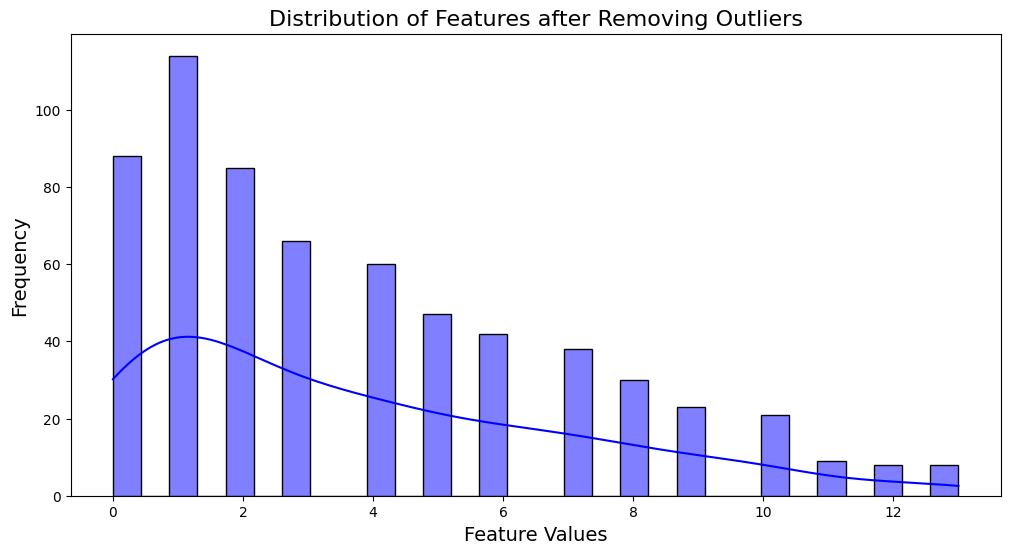

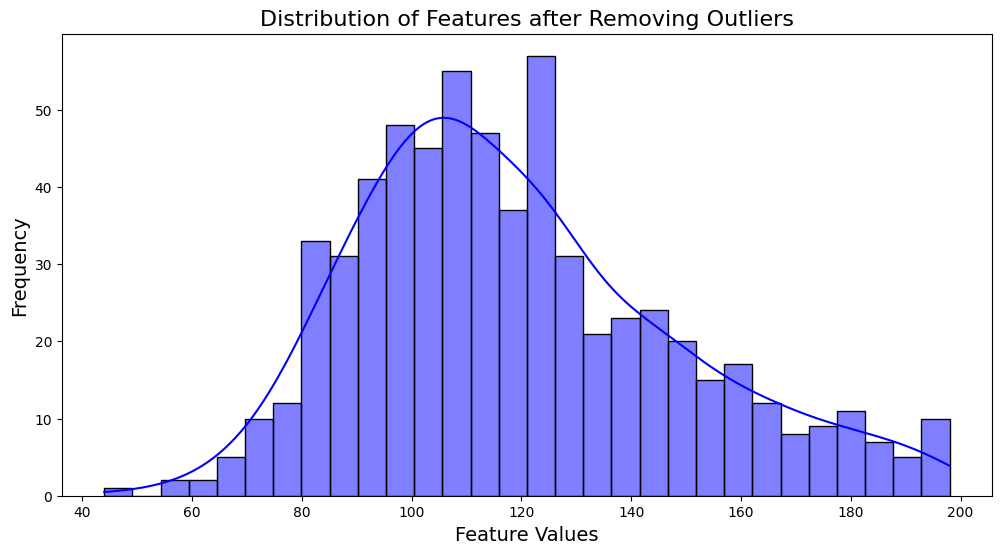

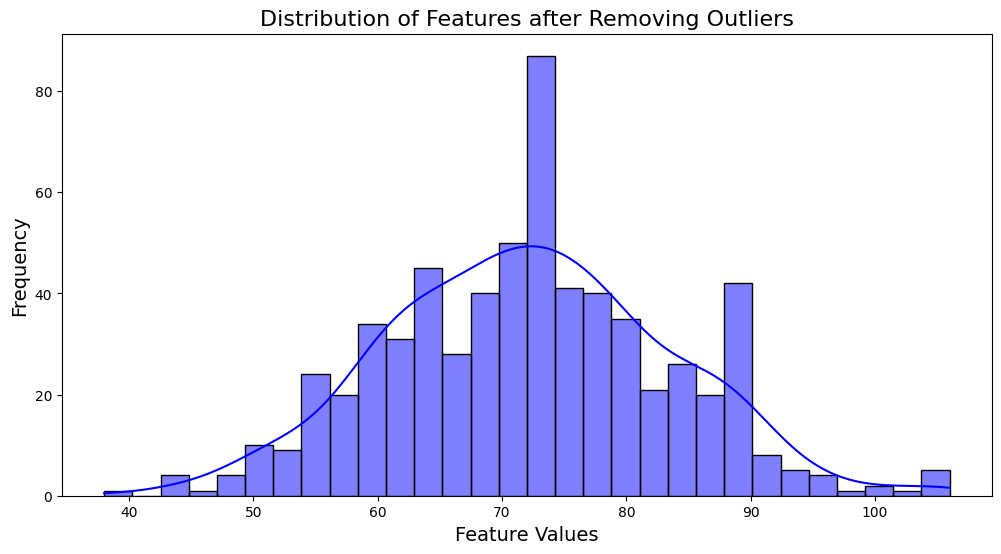

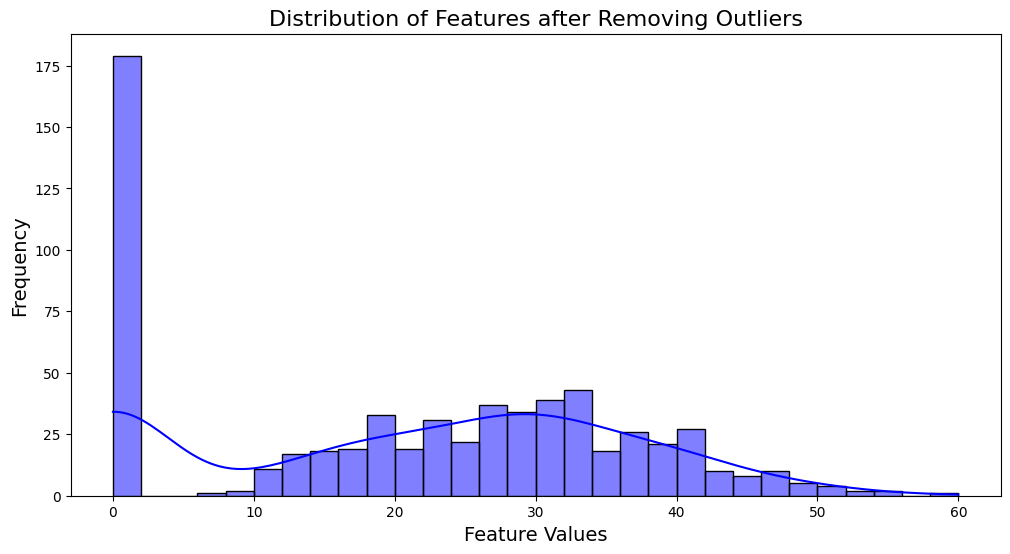

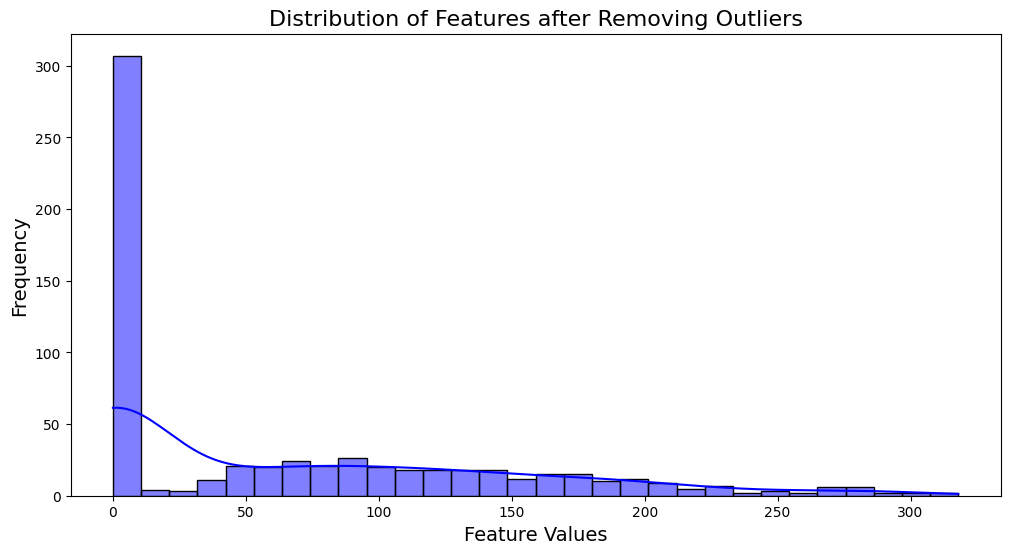

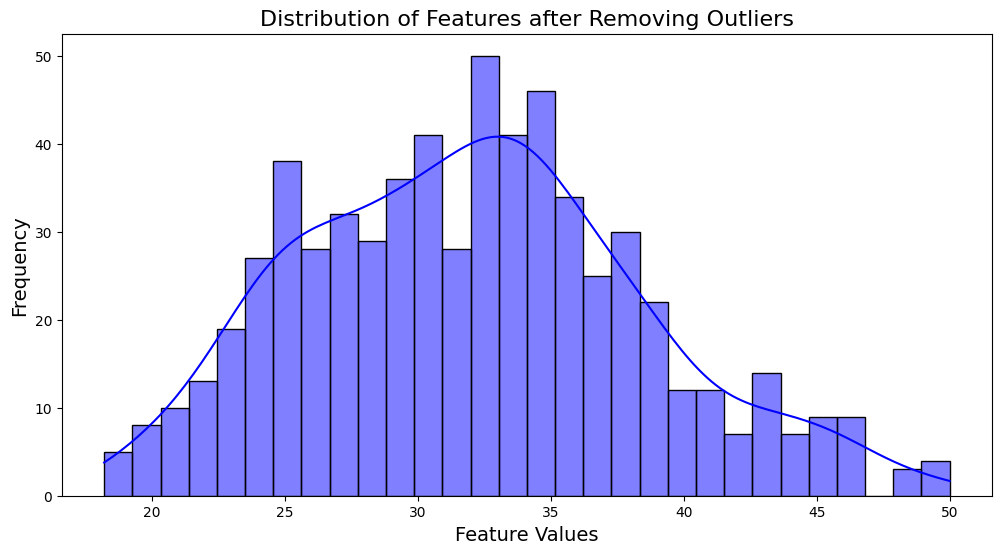

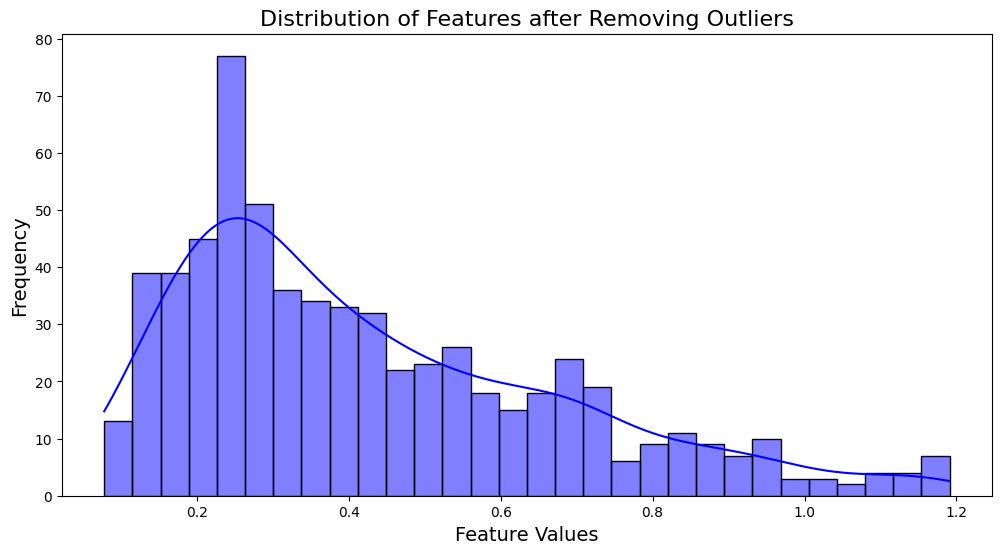

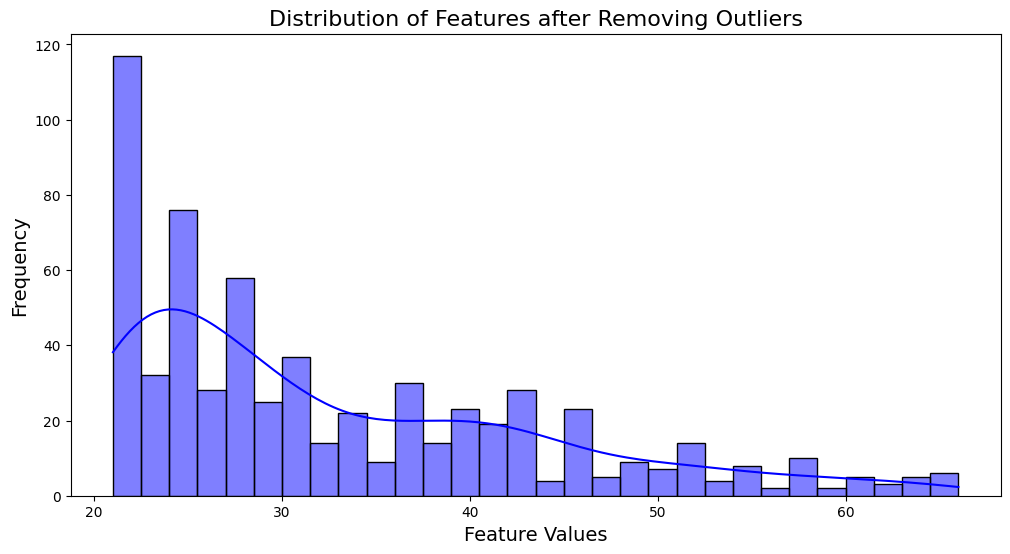

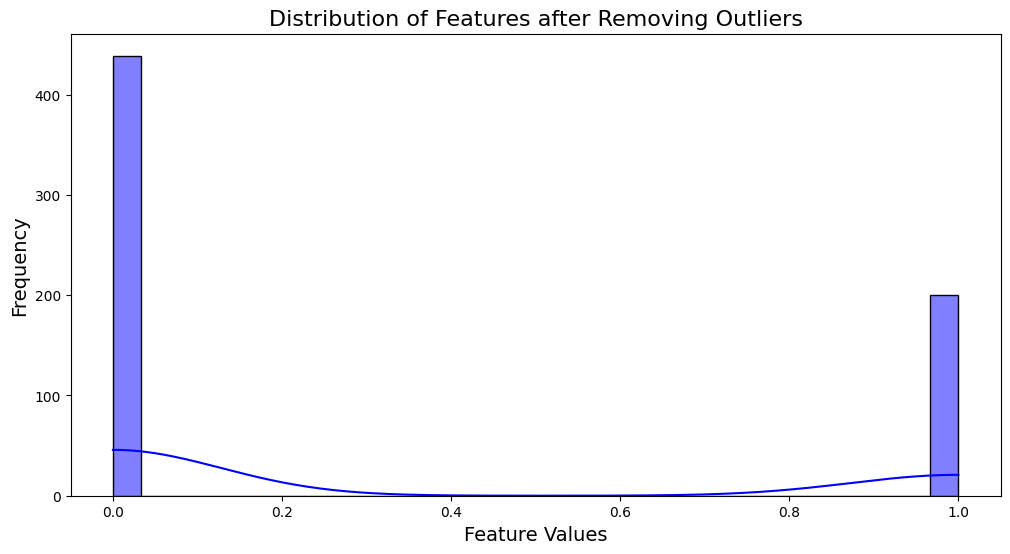

In [279]:
for i in data.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(data=data[i], kde=True, color='blue', bins=30)
    plt.title('Distribution of Features after Removing Outliers', fontsize=16)
    plt.xlabel('Feature Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

In [280]:
cor=data.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


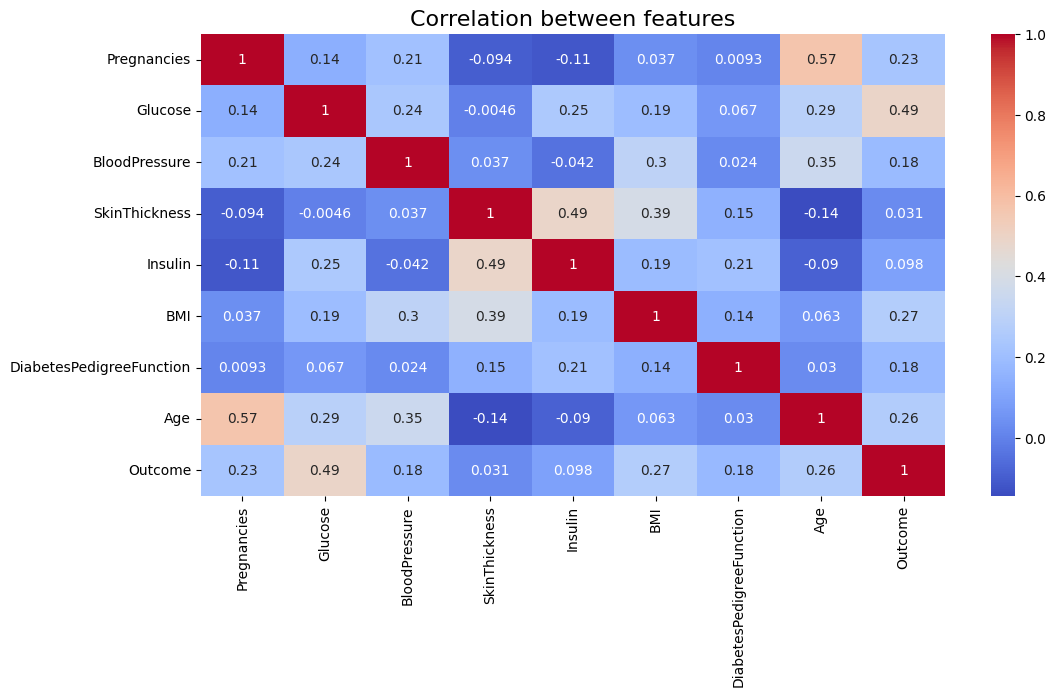

In [281]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation between features",fontsize=16)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop("Outcome",axis=1)
y=copy["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report=classification_report(y_test,y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 80.47%
Confusion Matrix:
[[77 15]
 [10 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        92
           1       0.63      0.72      0.68        36

    accuracy                           0.80       128
   macro avg       0.76      0.78      0.77       128
weighted avg       0.81      0.80      0.81       128



In [283]:
import pickle
with open("diabetes_model.pkl","wb") as f:
    pickle.dump(model,f)